In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('mortality_data.csv', delimiter = ',')
data

,rownames,Region,Status,Sex,Cause,Rate,SE
0,5,HHS Region 01,Urban,Male,Heart disease,188.2,1.0
1,6,HHS Region 01,Rural,Male,Heart disease,199.1,2.6
2,7,HHS Region 01,Urban,Female,Heart disease,115.1,0.6
3,8,HHS Region 01,Rural,Female,Heart disease,124.5,1.7
4,9,HHS Region 02,Urban,Male,Heart disease,226.8,0.8
...,...,...,...,...,...,...,...
395,508,HHS Region 09,Rural,Female,Nephritis,8.4,0.5
396,509,HHS Region 10,Urban,Male,Nephritis,8.6,0.3
397,510,HHS Region 10,Rural,Male,Nephritis,8.6,0.5
398,511,HHS Region 10,Urban,Female,Nephritis,5.9,0.2


In [3]:
data = data.to_numpy()

In [4]:
np.unique(data[:,4])

array(['Alzheimers', 'Cancer', 'Cerebrovascular diseases', 'Diabetes',
       'Flu and pneumonia', 'Heart disease', 'Lower respiratory',
       'Nephritis', 'Suicide', 'Unintentional injuries'], dtype=object)

In [5]:
np.unique(data[:,1])

array(['HHS Region 01', 'HHS Region 02', 'HHS Region 03', 'HHS Region 04',
       'HHS Region 05', 'HHS Region 06', 'HHS Region 07', 'HHS Region 08',
       'HHS Region 09', 'HHS Region 10'], dtype=object)

In [6]:
data[:,1] = np.where(data[:,1] == 'HHS Region 01',1, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 02',2, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 03',3, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 04',4, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 05',5, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 06',6, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 07',7, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 08',8, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 09',9, data[:,1])
data[:,1] = np.where(data[:,1] == 'HHS Region 10',10, data[:,1])

In [7]:
np.unique(data[:,1])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [8]:
data

array([[5, 1, 'Urban', ..., 'Heart disease', 188.2, 1.0],
       [6, 1, 'Rural', ..., 'Heart disease', 199.1, 2.6],
       [7, 1, 'Urban', ..., 'Heart disease', 115.1, 0.6],
       ...,
       [510, 10, 'Rural', ..., 'Nephritis', 8.6, 0.5],
       [511, 10, 'Urban', ..., 'Nephritis', 5.9, 0.2],
       [512, 10, 'Rural', ..., 'Nephritis', 6.7, 0.4]], dtype=object)

In [9]:
alz_rate_sum = np.sum(np.where(data[:,4] == 'Alzheimers',data[:,5],0))
cancer_rate_sum = np.sum(np.where(data[:,4] == 'Cancer',data[:,5],0))
CP_rate_sum = np.sum(np.where(data[:,4] == 'Cerebrovascular diseases',data[:,5],0))
diabetes_rate_sum = np.sum(np.where(data[:,4] == 'Diabetes',data[:,5],0))
FP_rate_sum = np.sum(np.where(data[:,4] == 'Flu and pneumonia',data[:,5],0))
HD_rate_sum = np.sum(np.where(data[:,4] == 'Heart disease',data[:,5],0))
LP_rate_sum = np.sum(np.where(data[:,4] == 'Lower respiratory',data[:,5],0))
neph_rate_sum = np.sum(np.where(data[:,4] == 'Nephritis',data[:,5],0))
suicide_rate_sum = np.sum(np.where(data[:,4] == 'Suicide',data[:,5],0))
UI_rate_sum = np.sum(np.where(data[:,4] == 'Unintentional injuries',data[:,5],0))

print(alz_rate_sum, cancer_rate_sum, CP_rate_sum, diabetes_rate_sum, FP_rate_sum, HD_rate_sum, LP_rate_sum, neph_rate_sum, suicide_rate_sum, UI_rate_sum, sep = ', ')


956.6999999999997, 6898.200000000002, 1491.3999999999999, 891.5000000000001, 647.2000000000002, 7068.6, 1865.4, 539.7, 598.6000000000001, 1805.4000000000003


In [10]:
variables = {
    "alz_rate_sum": 956.6999999999997,
    "cancer_rate_sum": 6898.200000000002,
    "CP_rate_sum": 1491.3999999999999,
    "diabetes_rate_sum": 891.5000000000001,
    "FP_rate_sum": 647.2000000000002,
    "HD_rate_sum": 7068.6,
    "LP_rate_sum": 1865.4,
    "neph_rate_sum": 539.7,
    "suicide_rate_sum": 598.6000000000001,
    "UI_rate_sum": 1805.4000000000003
}

sorted_variables = sorted(variables.items(), key=lambda item: item[1], reverse=True)


for var, value in sorted_variables:
    print(f"{var}: {value}")

HD_rate_sum: 7068.6
cancer_rate_sum: 6898.200000000002
LP_rate_sum: 1865.4
UI_rate_sum: 1805.4000000000003
CP_rate_sum: 1491.3999999999999
alz_rate_sum: 956.6999999999997
diabetes_rate_sum: 891.5000000000001
FP_rate_sum: 647.2000000000002
suicide_rate_sum: 598.6000000000001
neph_rate_sum: 539.7


In [11]:
alz_rate_sum + cancer_rate_sum + CP_rate_sum + diabetes_rate_sum + FP_rate_sum + HD_rate_sum + LP_rate_sum + neph_rate_sum + suicide_rate_sum + UI_rate_sum

22762.700000000004

In [12]:
alzheimers_data = data[data[:, 4] == 'Alzheimers']
cancer_data = data[data[:, 4] == 'Cancer']
cerebrovascular_data = data[data[:, 4] == 'Cerebrovascular diseases']
diabetes_data = data[data[:, 4] == 'Diabetes']
flu_pneumonia_data = data[data[:, 4] == 'Flu and pneumonia']
heart_disease_data = data[data[:, 4] == 'Heart disease']
lower_respiratory_data = data[data[:, 4] == 'Lower respiratory']
nephritis_data = data[data[:, 4] == 'Nephritis']
suicide_data = data[data[:, 4] == 'Suicide']
unintentional_injuries_data = data[data[:, 4] == 'Unintentional injuries']


In [13]:
alz_rate_avg = (np.sum(np.where(data[:,4] == 'Alzheimers',data[:,5],0)))/len(alzheimers_data)
cancer_rate_avg = (np.sum(np.where(data[:,4] == 'Cancer',data[:,5],0)))/len(cancer_data)
CP_rate_avg = (np.sum(np.where(data[:,4] == 'Cerebrovascular diseases',data[:,5],0)))/len(cerebrovascular_data)
diabetes_rate_avg = (np.sum(np.where(data[:,4] == 'Diabetes',data[:,5],0)))/len(diabetes_data)
FP_rate_avg = (np.sum(np.where(data[:,4] == 'Flu and pneumonia',data[:,5],0)))/len(flu_pneumonia_data)
HD_rate_avg = (np.sum(np.where(data[:,4] == 'Heart disease',data[:,5],0)))/len(heart_disease_data)
LP_rate_avg = (np.sum(np.where(data[:,4] == 'Lower respiratory',data[:,5],0)))/len(lower_respiratory_data)
neph_rate_avg = (np.sum(np.where(data[:,4] == 'Nephritis',data[:,5],0)))/len(nephritis_data)
suicide_rate_avg = (np.sum(np.where(data[:,4] == 'Suicide',data[:,5],0)))/len(suicide_data)
UI_rate_avg = (np.sum(np.where(data[:,4] == 'Unintentional injuries',data[:,5],0)))/len(unintentional_injuries_data)

In [14]:
print("Alzheimer's Rate Average:", alz_rate_avg)
print("Cancer Rate Average:", cancer_rate_avg)
print("Cerebrovascular Diseases Rate Average:", CP_rate_avg)
print("Diabetes Rate Average:", diabetes_rate_avg)
print("Flu and Pneumonia Rate Average:", FP_rate_avg)
print("Heart Disease Rate Average:", HD_rate_avg)
print("Lower Respiratory Rate Average:", LP_rate_avg)
print("Nephritis Rate Average:", neph_rate_avg)
print("Suicide Rate Average:", suicide_rate_avg)
print("Unintentional Injuries Rate Average:", UI_rate_avg)

Alzheimer's Rate Average: 23.917499999999993
Cancer Rate Average: 172.45500000000004
Cerebrovascular Diseases Rate Average: 37.285
Diabetes Rate Average: 22.2875
Flu and Pneumonia Rate Average: 16.180000000000003
Heart Disease Rate Average: 176.715
Lower Respiratory Rate Average: 46.635000000000005
Nephritis Rate Average: 13.492500000000001
Suicide Rate Average: 14.965000000000003
Unintentional Injuries Rate Average: 45.135000000000005


In [15]:
# Create a list of tuples with the condition name and its average rate
rate_avgs = [
    ("Alzheimer's Rate Average", alz_rate_avg),
    ("Cancer Rate Average", cancer_rate_avg),
    ("Cerebrovascular Diseases Rate Average", CP_rate_avg),
    ("Diabetes Rate Average", diabetes_rate_avg),
    ("Flu and Pneumonia Rate Average", FP_rate_avg),
    ("Heart Disease Rate Average", HD_rate_avg),
    ("Lower Respiratory Rate Average", LP_rate_avg),
    ("Nephritis Rate Average", neph_rate_avg),
    ("Suicide Rate Average", suicide_rate_avg),
    ("Unintentional Injuries Rate Average", UI_rate_avg)
]

# Sort the list in descending order based on the average rates
rate_avgs_sorted = sorted(rate_avgs, key=lambda x: x[1], reverse=True)

# Print the sorted list
for condition, avg in rate_avgs_sorted:
    print(f"{condition}: {avg}")


Heart Disease Rate Average: 176.715
Cancer Rate Average: 172.45500000000004
Lower Respiratory Rate Average: 46.635000000000005
Unintentional Injuries Rate Average: 45.135000000000005
Cerebrovascular Diseases Rate Average: 37.285
Alzheimer's Rate Average: 23.917499999999993
Diabetes Rate Average: 22.2875
Flu and Pneumonia Rate Average: 16.180000000000003
Suicide Rate Average: 14.965000000000003
Nephritis Rate Average: 13.492500000000001


In [16]:
import seaborn
import matplotlib.pyplot as plt

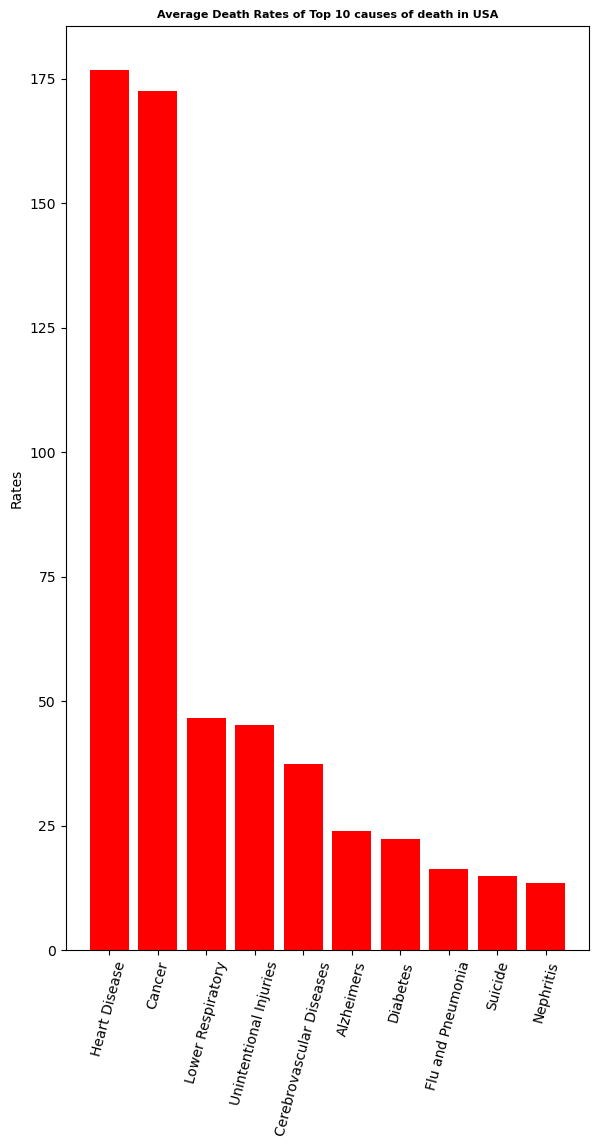

In [17]:
plt.figure(figsize = (6.75, 12))
plt.bar(x = ['Heart Disease', 'Cancer', 'Lower Respiratory', 'Unintentional Injuries', 'Cerebrovascular Diseases', 'Alzheimers', 'Diabetes', 'Flu and Pneumonia', 'Suicide', 'Nephritis'],
        height = [176.715,172.45500000000004,46.635000000000005,45.135000000000005,37.285,23.917499999999993,22.2875,16.180000000000003,14.965000000000003,13.492500000000001],
        color = 'red')
plt.xticks(rotation = 75)
plt.title('Average Death Rates of Top 10 causes of death in USA', fontsize = 8, fontweight = 'bold')
plt.ylabel('Rates')
plt.show()

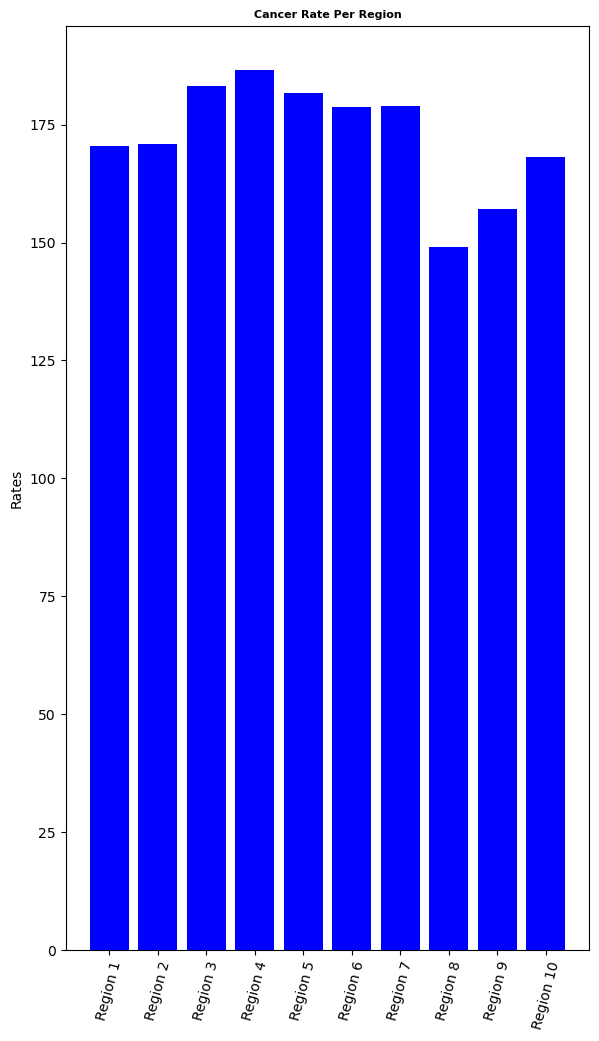

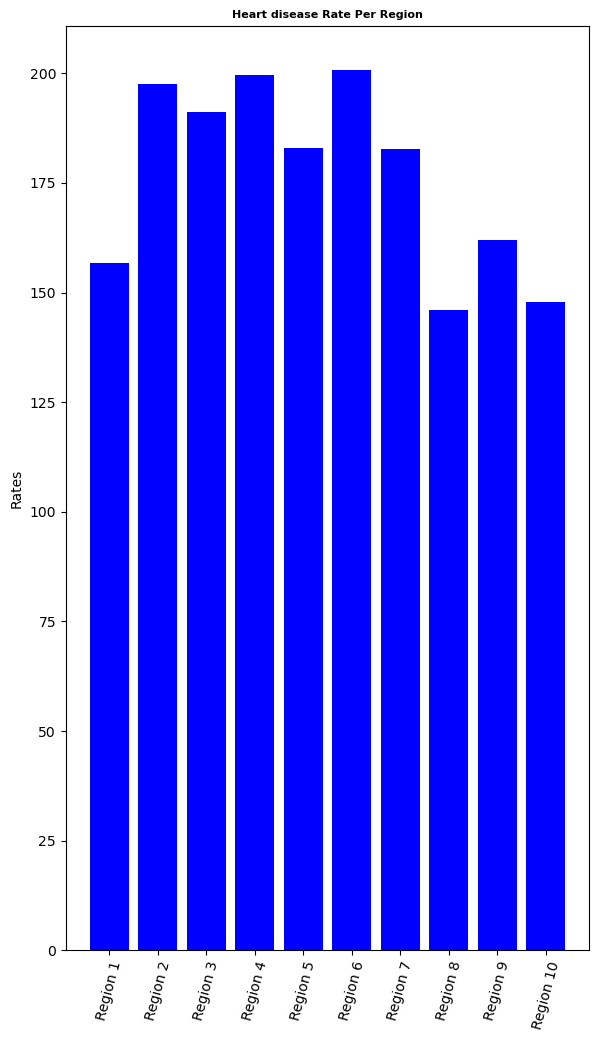

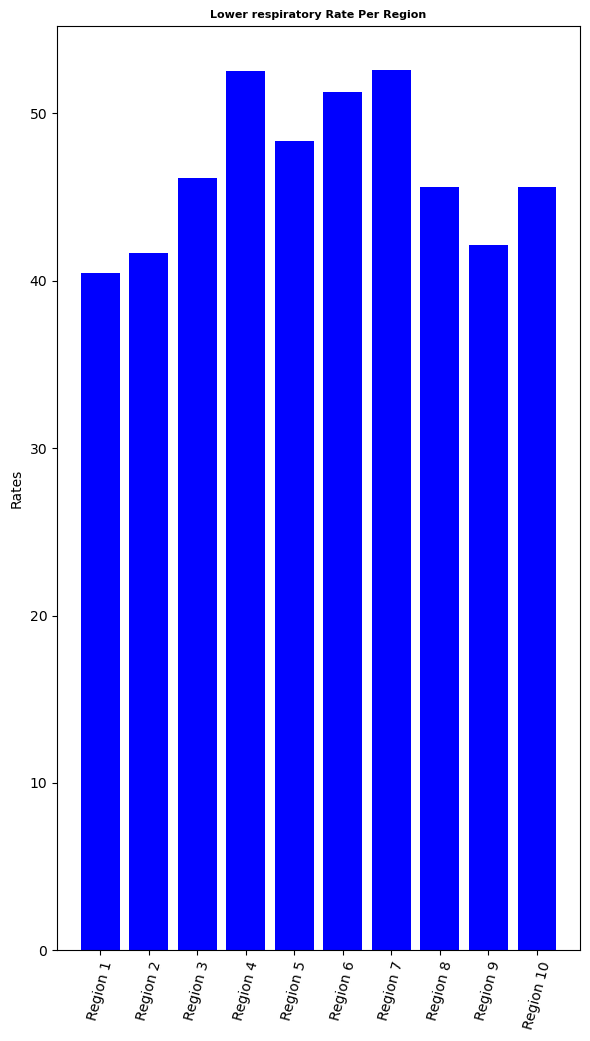

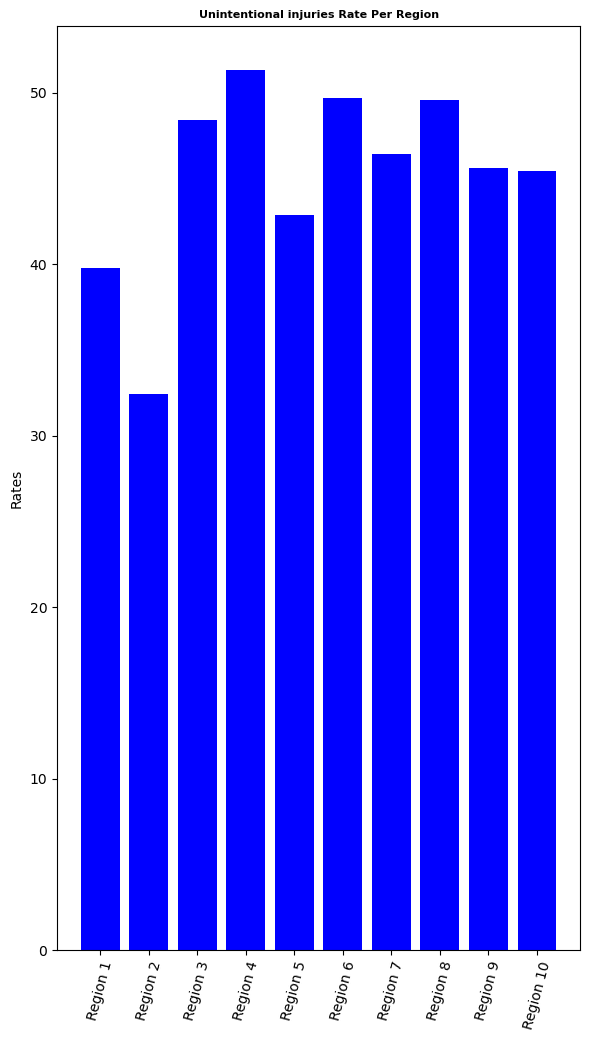

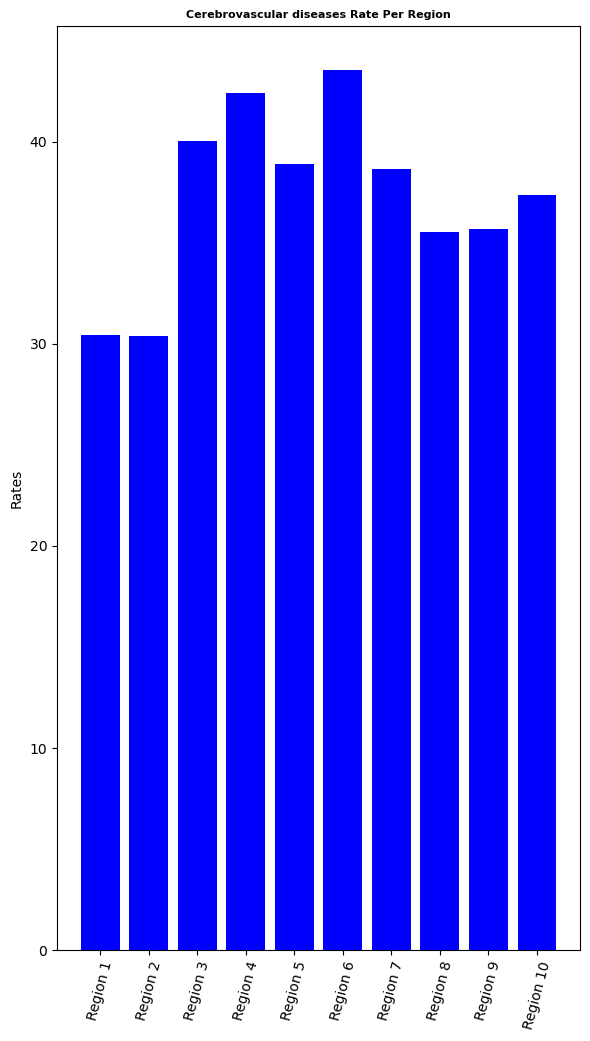

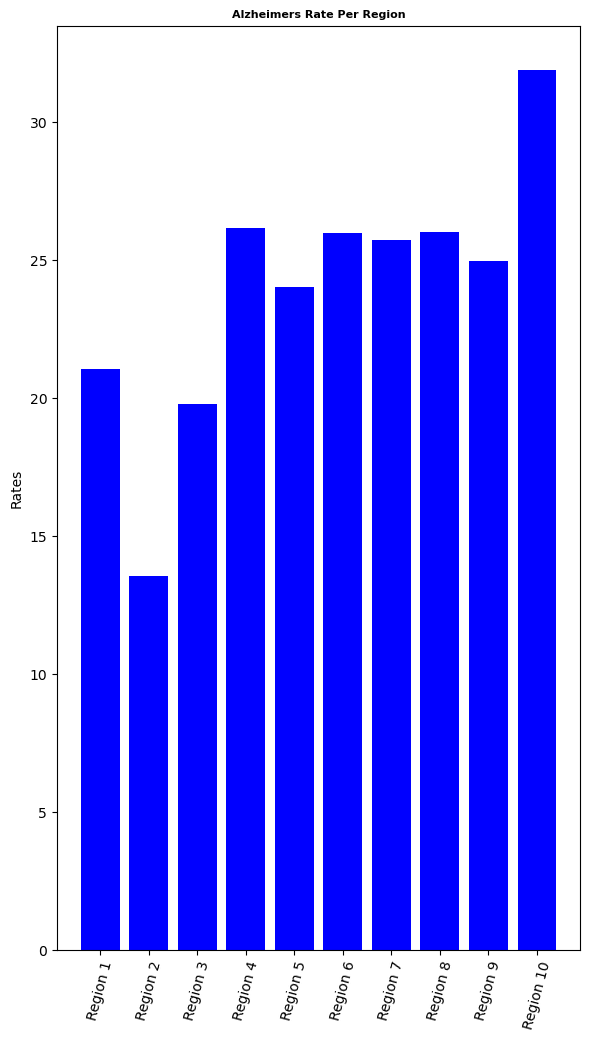

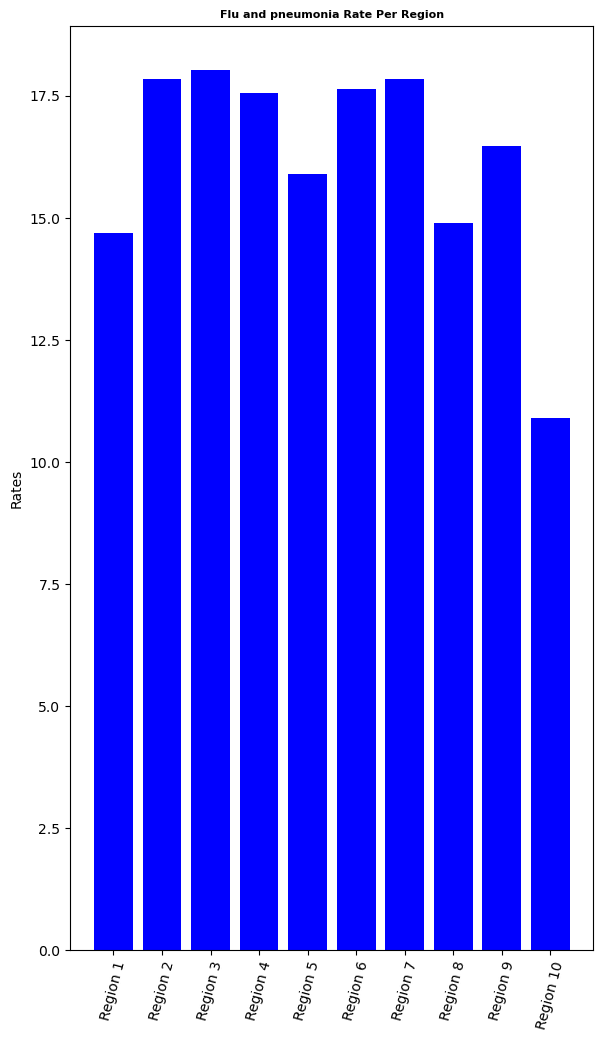

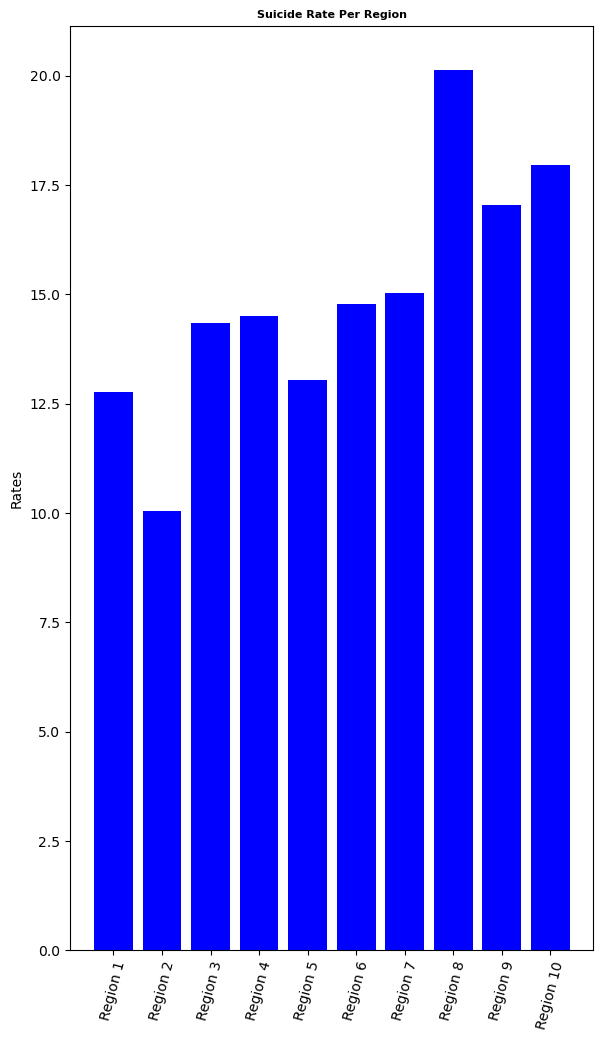

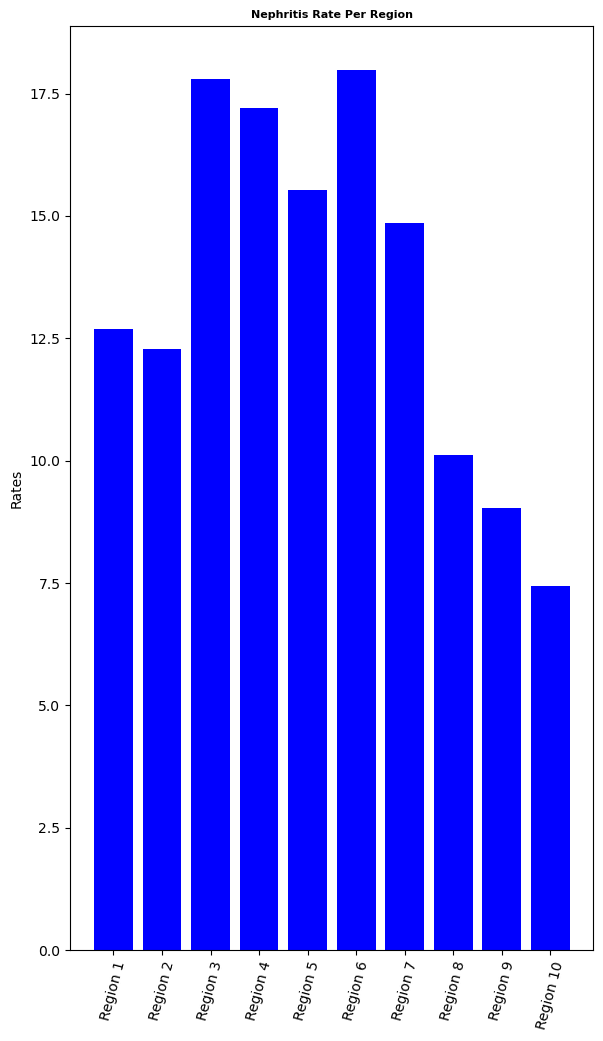

In [18]:
diseases = ['Cancer', 'Heart disease', 'Lower respiratory', 'Unintentional injuries', 'Cerebrovascular diseases', 
            'Alzheimers', 'Flu and pneumonia', 'Suicide', 'Nephritis']

regions = range(1, 11)

for disease in diseases:
    avg_rates = []
    
    for region in regions:
        region_data = data[(data[:, 1] == region) & (data[:, 4] == disease)]
        avg_rate = np.sum(np.where((data[:, 1] == region) & (data[:, 4] == disease), data[:, 5], 0)) / len(region_data)
        avg_rates.append(avg_rate)
    
    plt.figure(figsize=(6.75, 12))
    plt.bar(x=[f"Region {i}" for i in regions], height=avg_rates, color='blue')
    plt.xticks(rotation=75)
    plt.title(f'{disease} Rate Per Region', fontsize=8, fontweight='bold')
    plt.ylabel('Rates')
    plt.show()


[13.492500000000001, 14.965000000000003, 16.180000000000003, 22.2875, 23.917499999999993, 37.285, 45.135000000000005, 46.635000000000005, 172.45500000000004, 176.715]
('Nephritis', 'Suicide', 'Flu and pneumonia', 'Diabetes', 'Alzheimers', 'Cerebrovascular diseases', 'Unintentional injuries', 'Lower respiratory', 'Cancer', 'Heart disease')


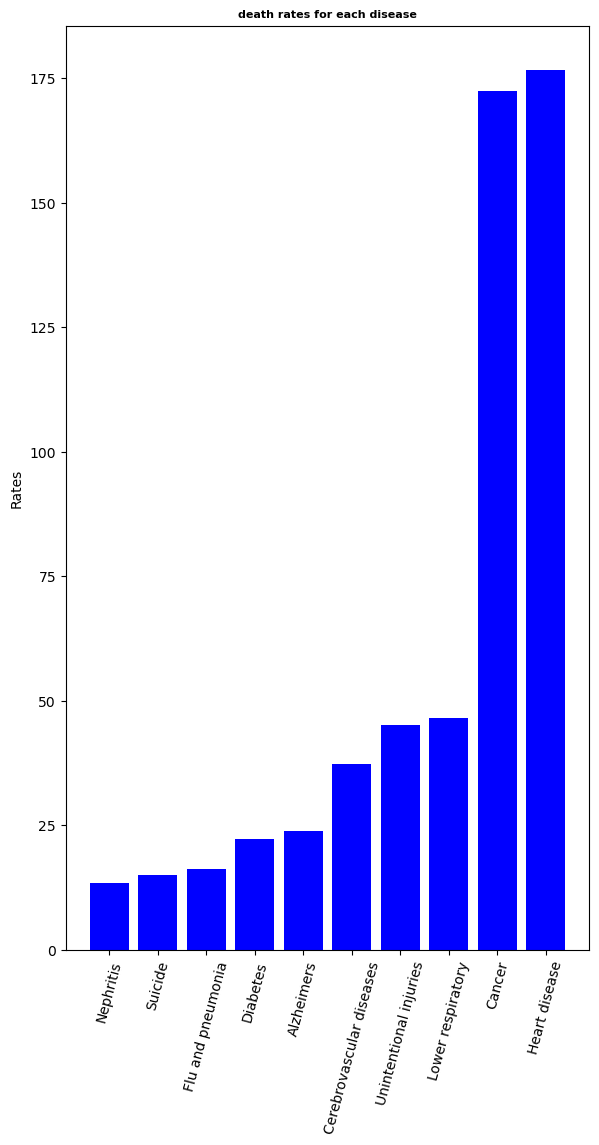

In [19]:
diseases = ['Alzheimers', 'Cancer', 'Cerebrovascular diseases', 'Diabetes', 'Flu and pneumonia', 'Heart disease', 'Lower respiratory', 'Nephritis', 'Suicide', 'Unintentional injuries']

disease_avgs = []
for disease in diseases:
    disease_data = data[data[:, 4] == f'{disease}']
    disease_rate_avg = (np.sum(np.where(data[:,4] == f'{disease}',data[:,5],0)))/len(disease_data)
    disease_avgs.append(disease_rate_avg)


diseases = diseases[7],diseases[8],diseases[4],diseases[3],diseases[0],diseases[2],diseases[9],diseases[6],diseases[1],diseases[5]
print(sorted(disease_avgs))
print(diseases)

plt.figure(figsize=(6.75, 12))
plt.bar(x = diseases, height = sorted(disease_avgs) , color='blue')
plt.xticks(rotation=75)
plt.title('death rates for each disease', fontsize=8, fontweight='bold')
plt.ylabel('Rates')
plt.show()


In [23]:
# now to find the avg. death rate in each region
avgs = []
for i in range(1,11):
    region_data = data[data[:,1] == i]
    avgs.append(np.mean(region_data[:,5]))

print(avgs)

[51.6725, 54.647500000000015, 60.355000000000004, 63.25999999999999, 58.665000000000035, 62.629999999999995, 59.37750000000001, 51.7075, 53.11749999999999, 53.63499999999999]


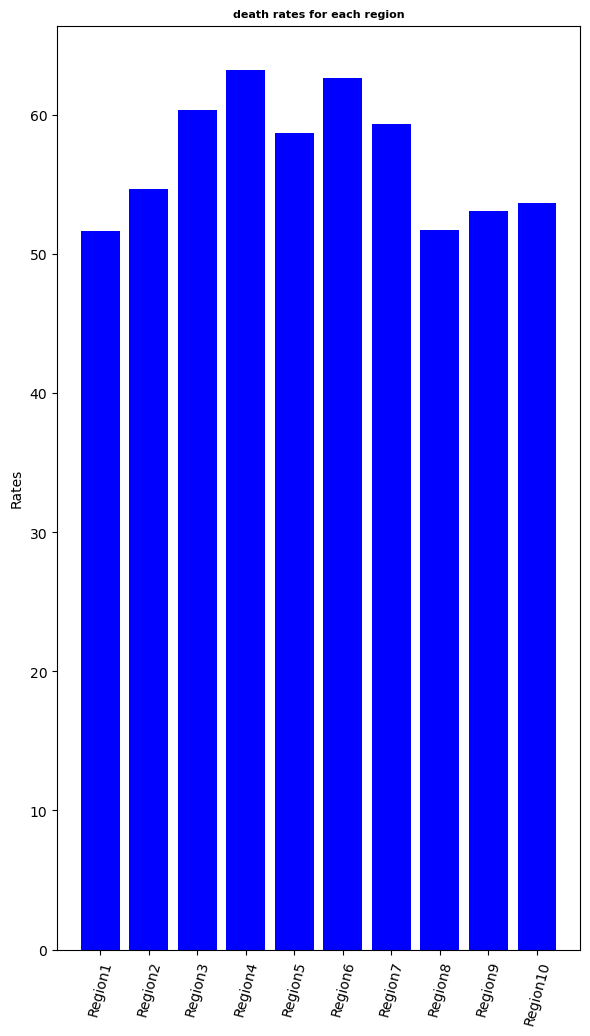

In [24]:
plt.figure(figsize=(6.75, 12))
plt.bar(x = [f'Region{i}' for i in range(1,11)], height = avgs , color='blue')
plt.xticks(rotation=75)
plt.title('death rates for each region', fontsize=8, fontweight='bold')
plt.ylabel('Rates')
plt.show()

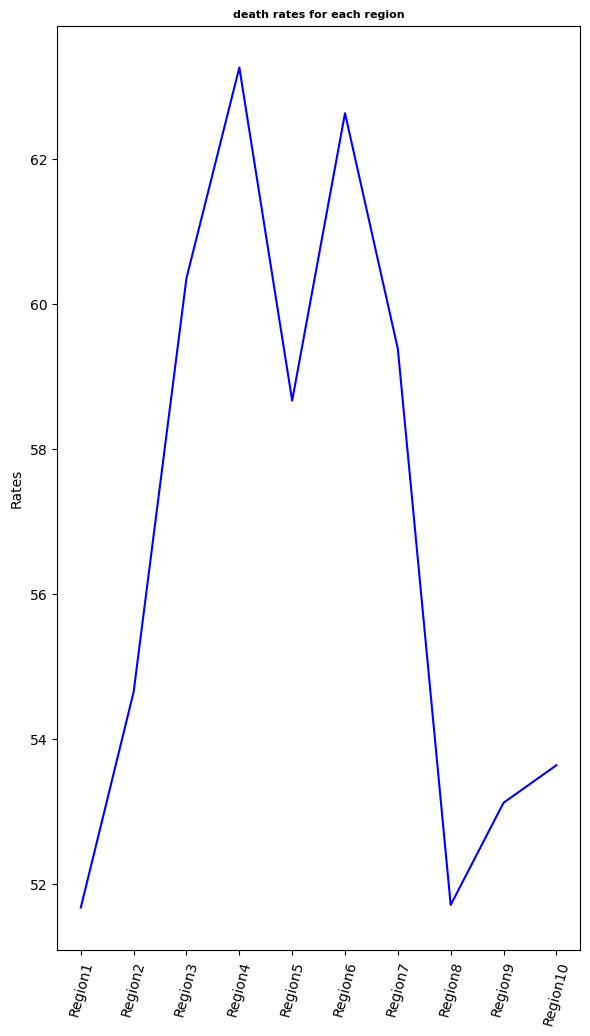

In [25]:
plt.figure(figsize=(6.75, 12))
plt.plot([f'Region{i}' for i in range(1,11)], avgs, color='blue')
plt.xticks(rotation=75)
plt.title('death rates for each region', fontsize=8, fontweight='bold')
plt.ylabel('Rates')
plt.show()